In [1]:
import matplotlib.pyplot as plt
import torch

from IPython.display import Image, display
from main import Generator, Discriminator
from torchsummary import summary

# Task 1

In [7]:
generator = Generator(100, 128, 1)
summary(generator, input_size=(100, 1, 1), device='cpu')
print(generator)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1            [-1, 512, 4, 4]         819,200
       BatchNorm2d-2            [-1, 512, 4, 4]           1,024
              ReLU-3            [-1, 512, 4, 4]               0
   ConvTranspose2d-4            [-1, 256, 7, 7]       1,179,648
       BatchNorm2d-5            [-1, 256, 7, 7]             512
              ReLU-6            [-1, 256, 7, 7]               0
   ConvTranspose2d-7          [-1, 128, 14, 14]         524,288
       BatchNorm2d-8          [-1, 128, 14, 14]             256
              ReLU-9          [-1, 128, 14, 14]               0
  ConvTranspose2d-10            [-1, 1, 28, 28]           2,048
             Tanh-11            [-1, 1, 28, 28]               0
Total params: 2,526,976
Trainable params: 2,526,976
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forw

In [8]:
discriminator = Discriminator(1, 128)
summary(discriminator, input_size=(1, 28, 28), device='cpu')
print(discriminator)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 14, 14]           2,048
         LeakyReLU-2          [-1, 128, 14, 14]               0
            Conv2d-3            [-1, 256, 7, 7]         524,288
       BatchNorm2d-4            [-1, 256, 7, 7]             512
         LeakyReLU-5            [-1, 256, 7, 7]               0
            Conv2d-6            [-1, 512, 4, 4]       1,179,648
       BatchNorm2d-7            [-1, 512, 4, 4]           1,024
         LeakyReLU-8            [-1, 512, 4, 4]               0
            Conv2d-9              [-1, 1, 1, 1]           8,192
          Sigmoid-10              [-1, 1, 1, 1]               0
Total params: 1,715,712
Trainable params: 1,715,712
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.86
Params size (MB): 6.54
Estimat

# Task 2

In [9]:
!rm -f ./images/*

fish: No matches for wildcard “./images/*”. See `help expand`.
rm -f ./images/*
      ^


In [10]:
%run main.py

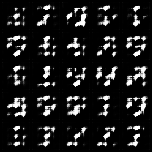

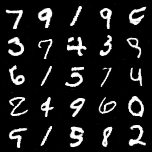

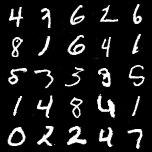

In [17]:
display(Image(filename='./images/0.png'))
display(Image(filename='./images/50.png'))
display(Image(filename='./images/99.png'))

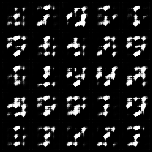

In [2]:
display(Image(filename='train.gif'))

# Task 3

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
generator = Generator(100, 128, 1).to(device)
generator.load_state_dict(torch.load('./model/mode.pth', map_location=device))

<All keys matched successfully>

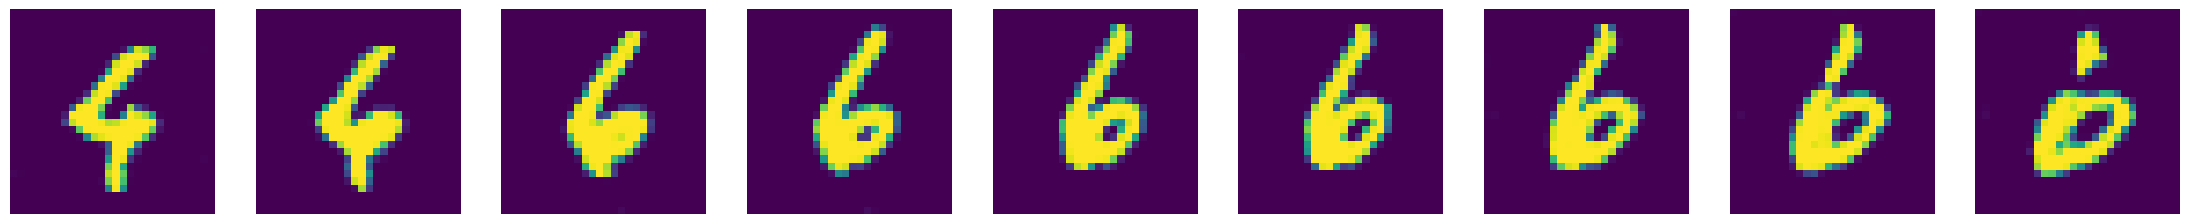

In [24]:
noises = []
start = torch.randn(1, 100, 1, 1, device=device)
end = torch.randn(1, 100, 1, 1, device=device)
for i in range(9):
    noises.append(start + (end - start) / 8 * i)

fig, axs = plt.subplots(1, 9, figsize=(28, 28))
for i in range(len(noises)):
    img = generator(noises[i]).squeeze().cpu().detach().numpy()
    axs[i].set_axis_off()
    axs[i].imshow(img)
plt.show()

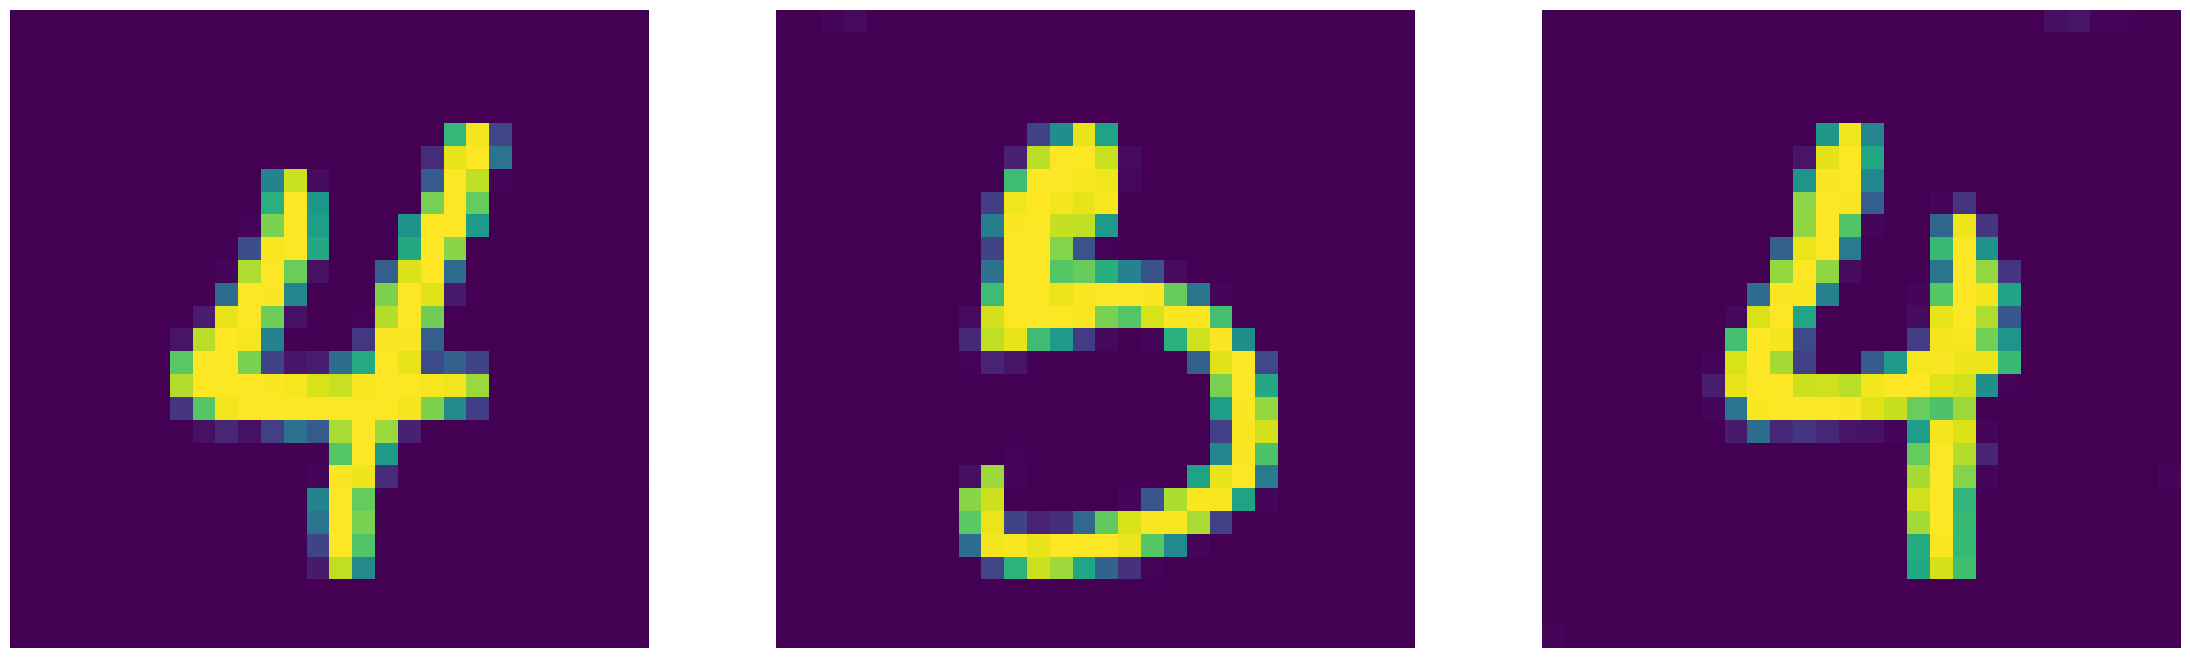

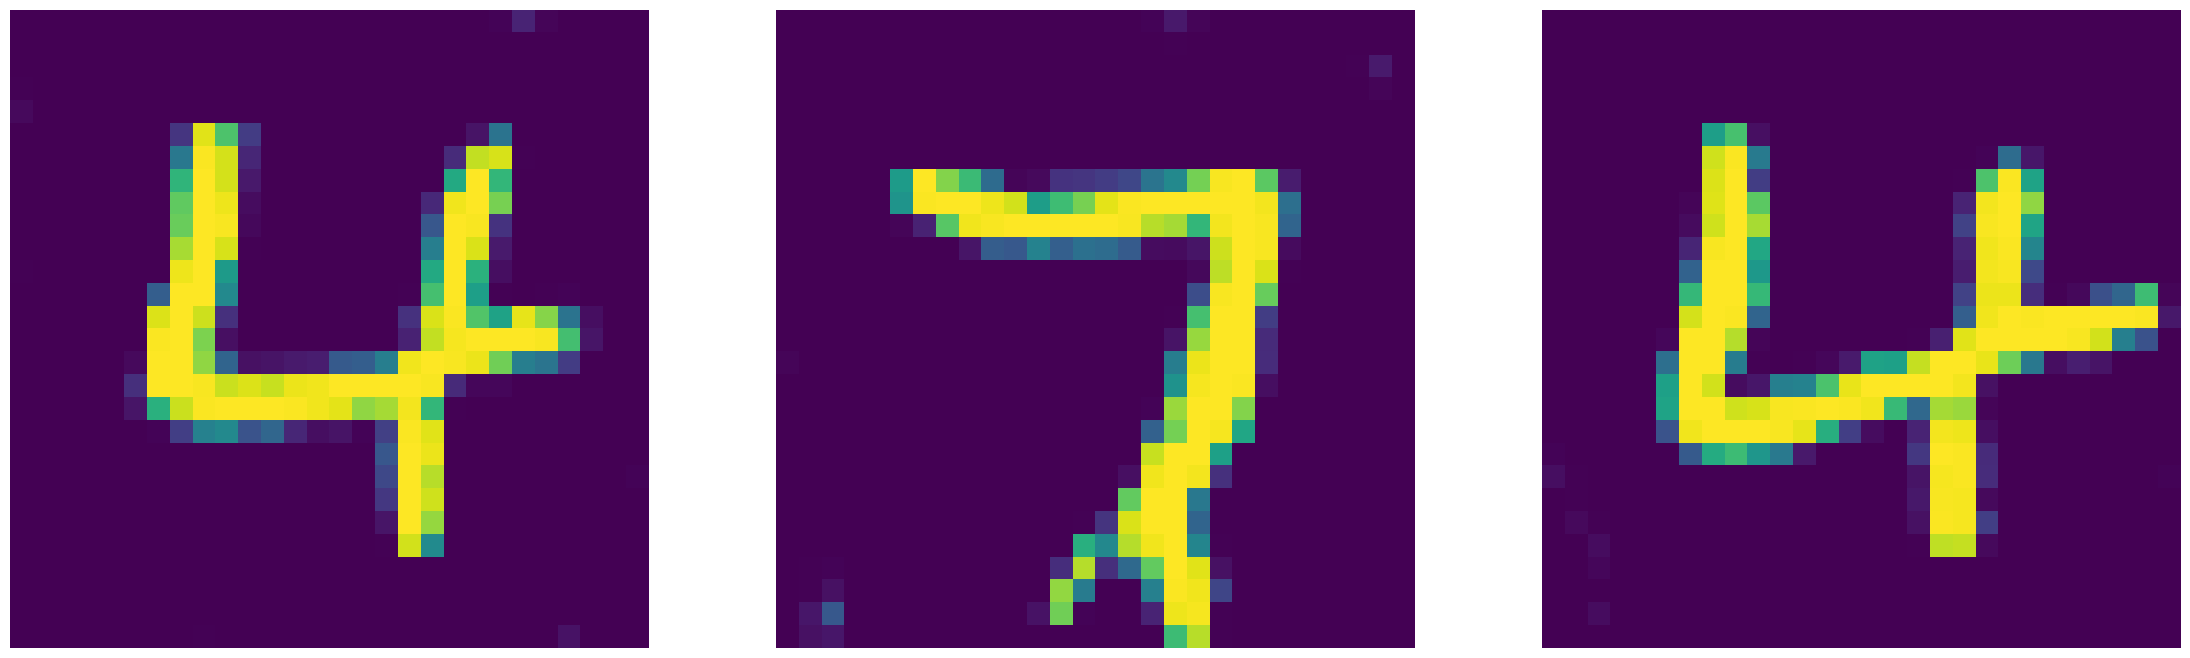

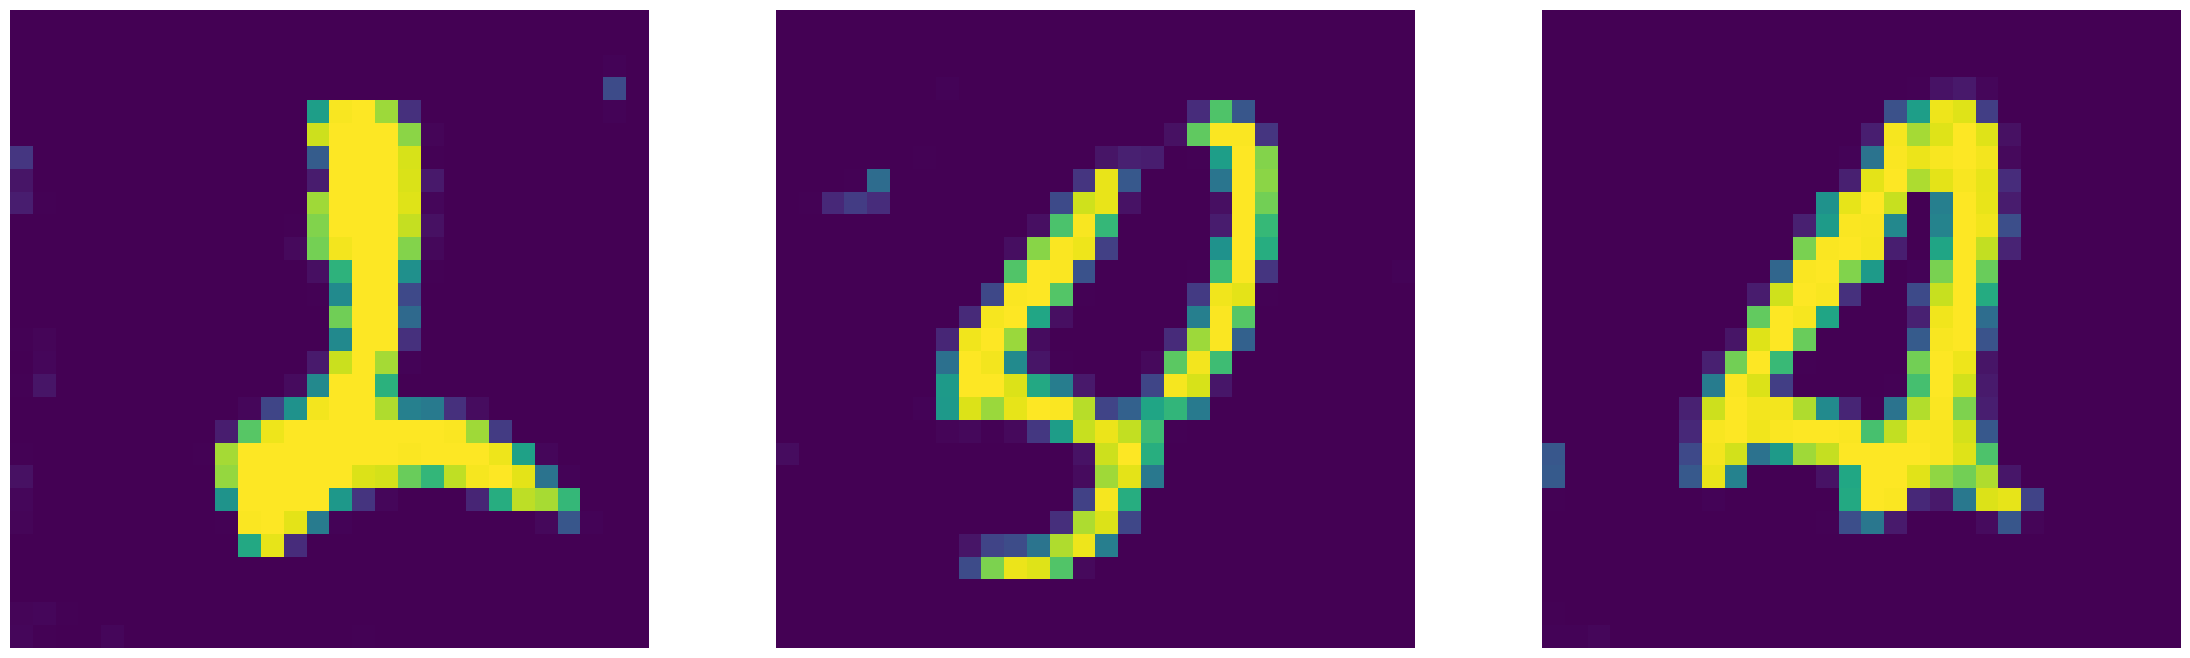

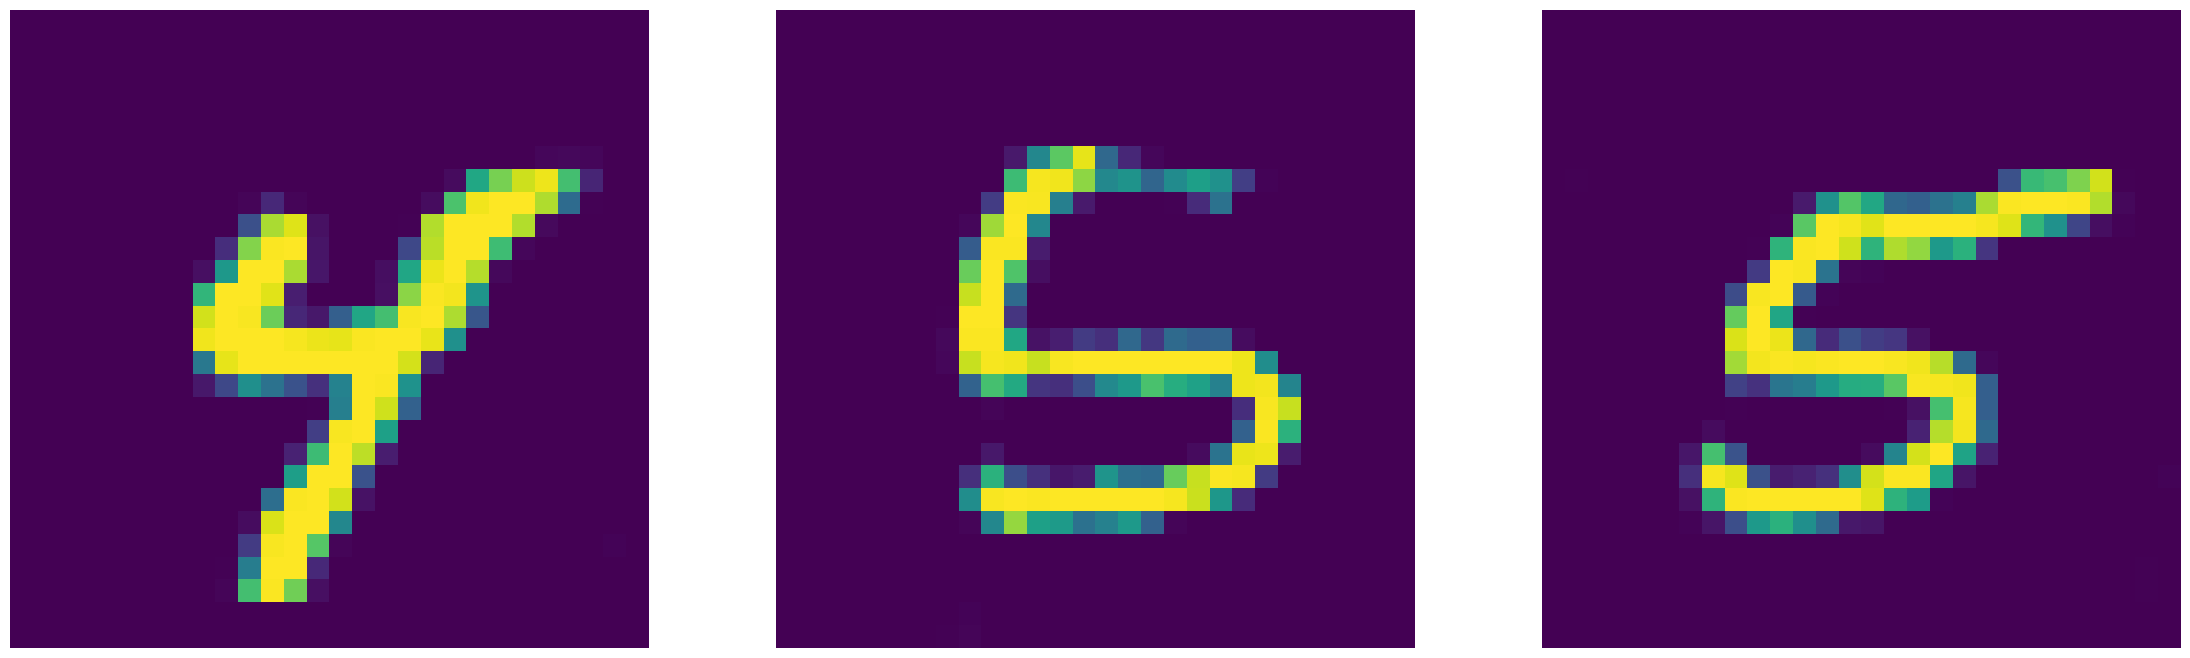

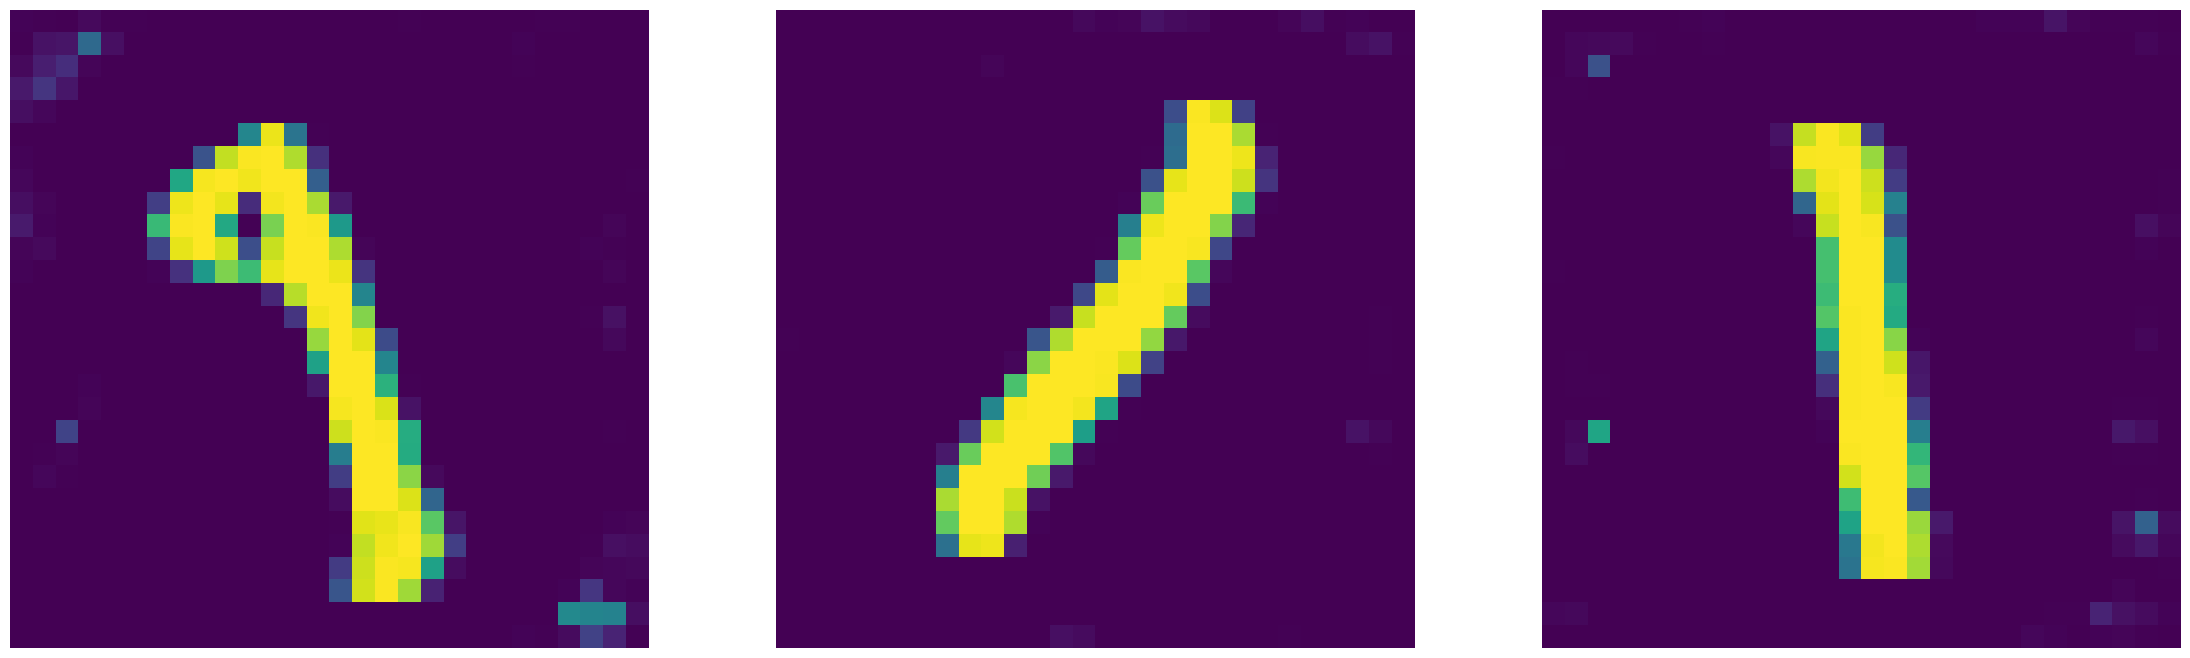

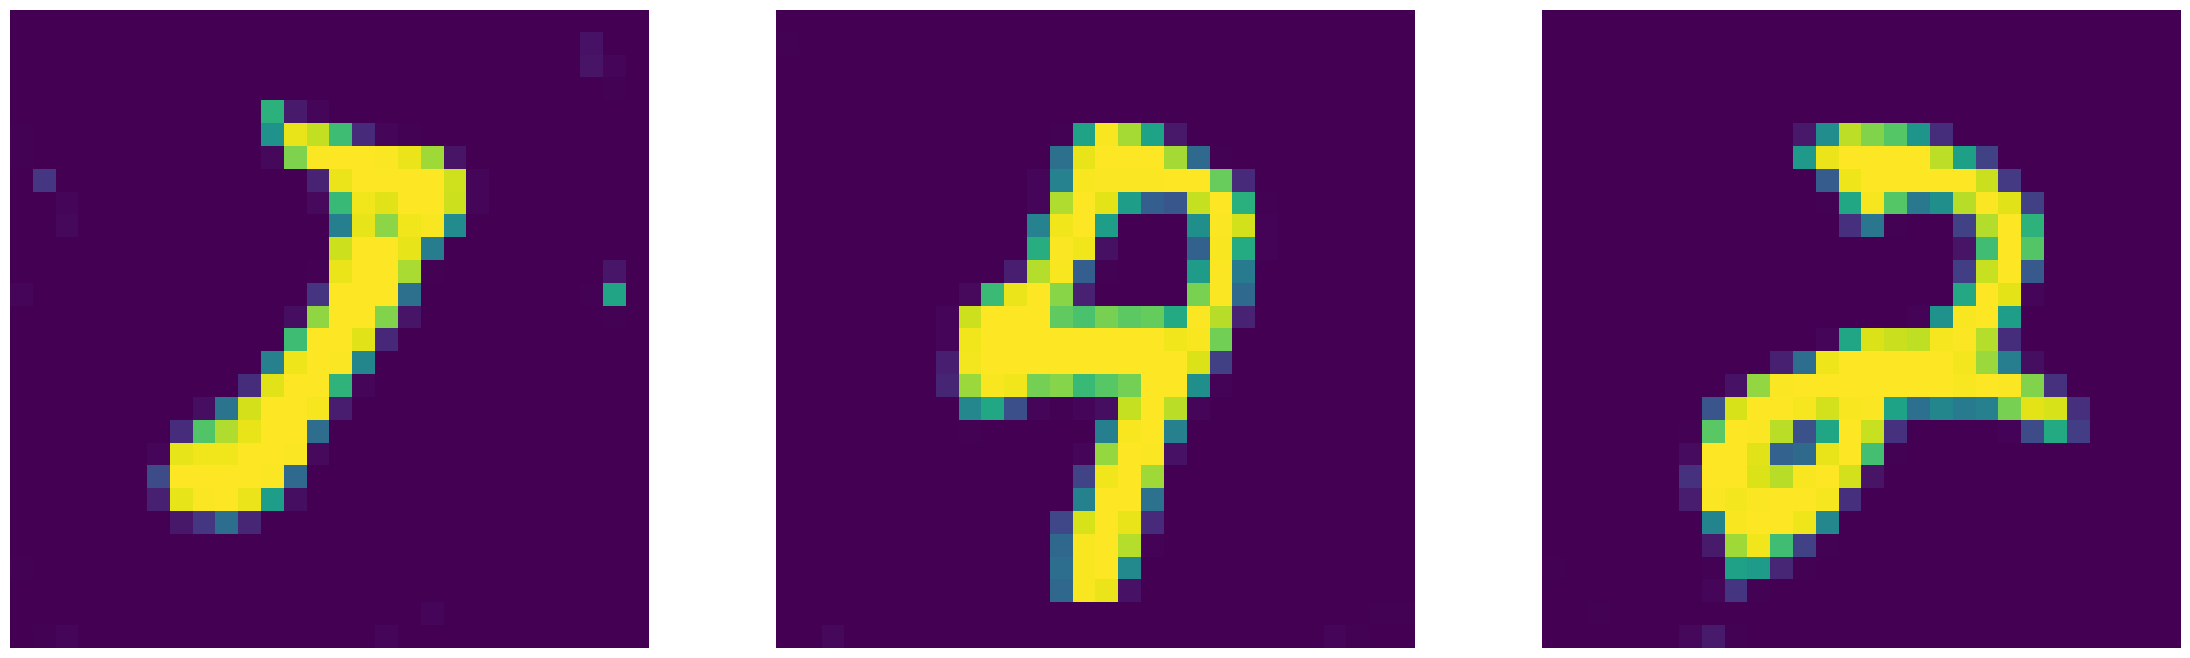

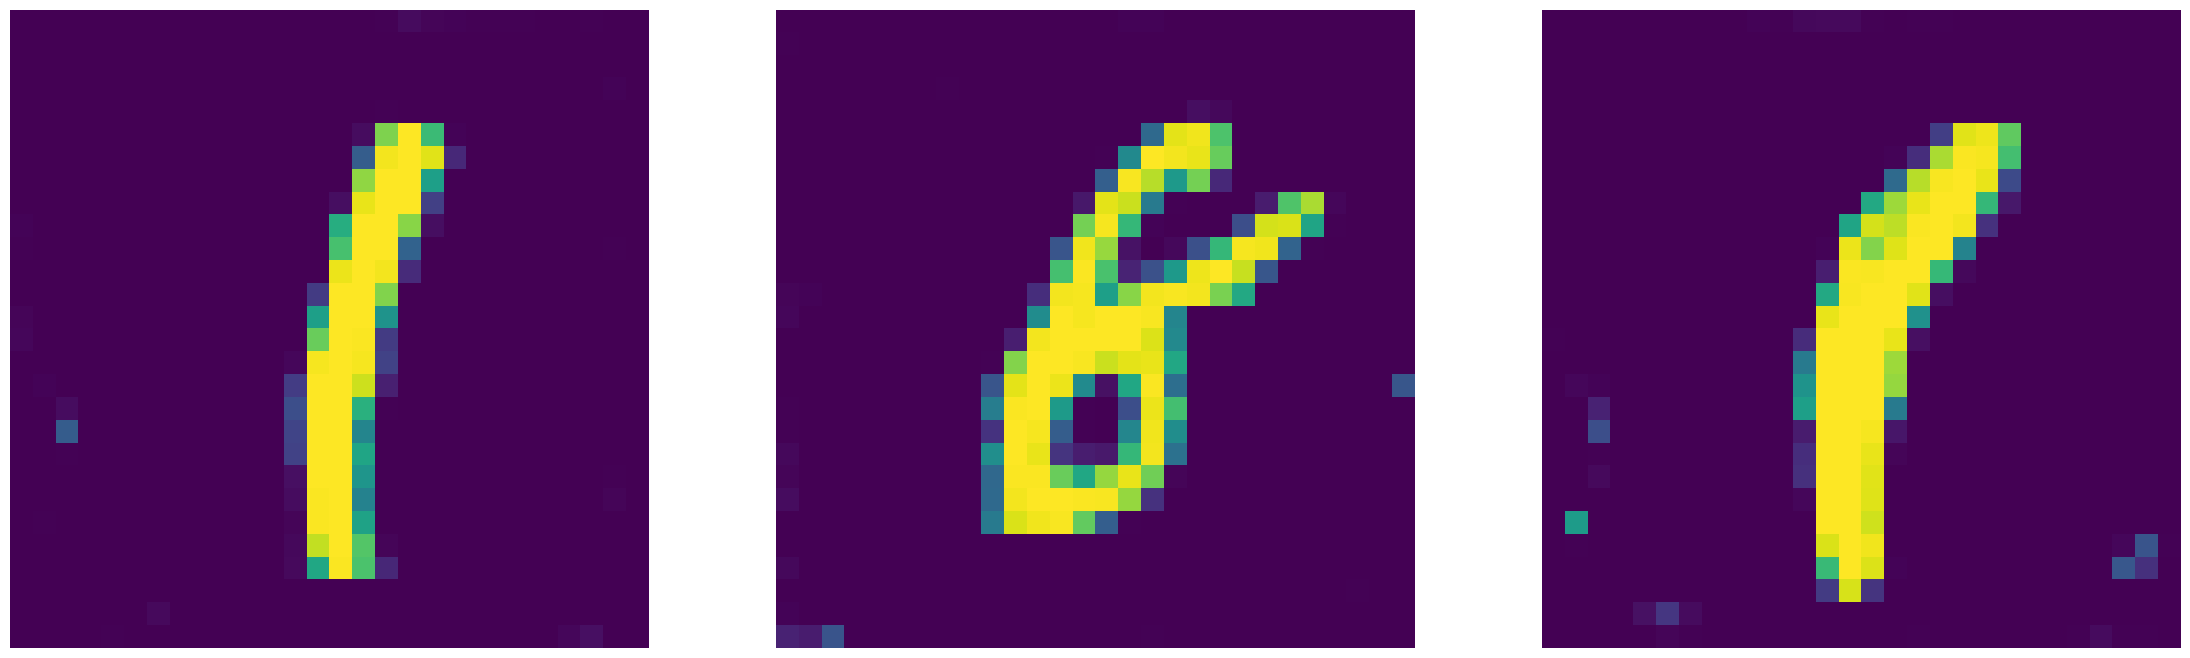

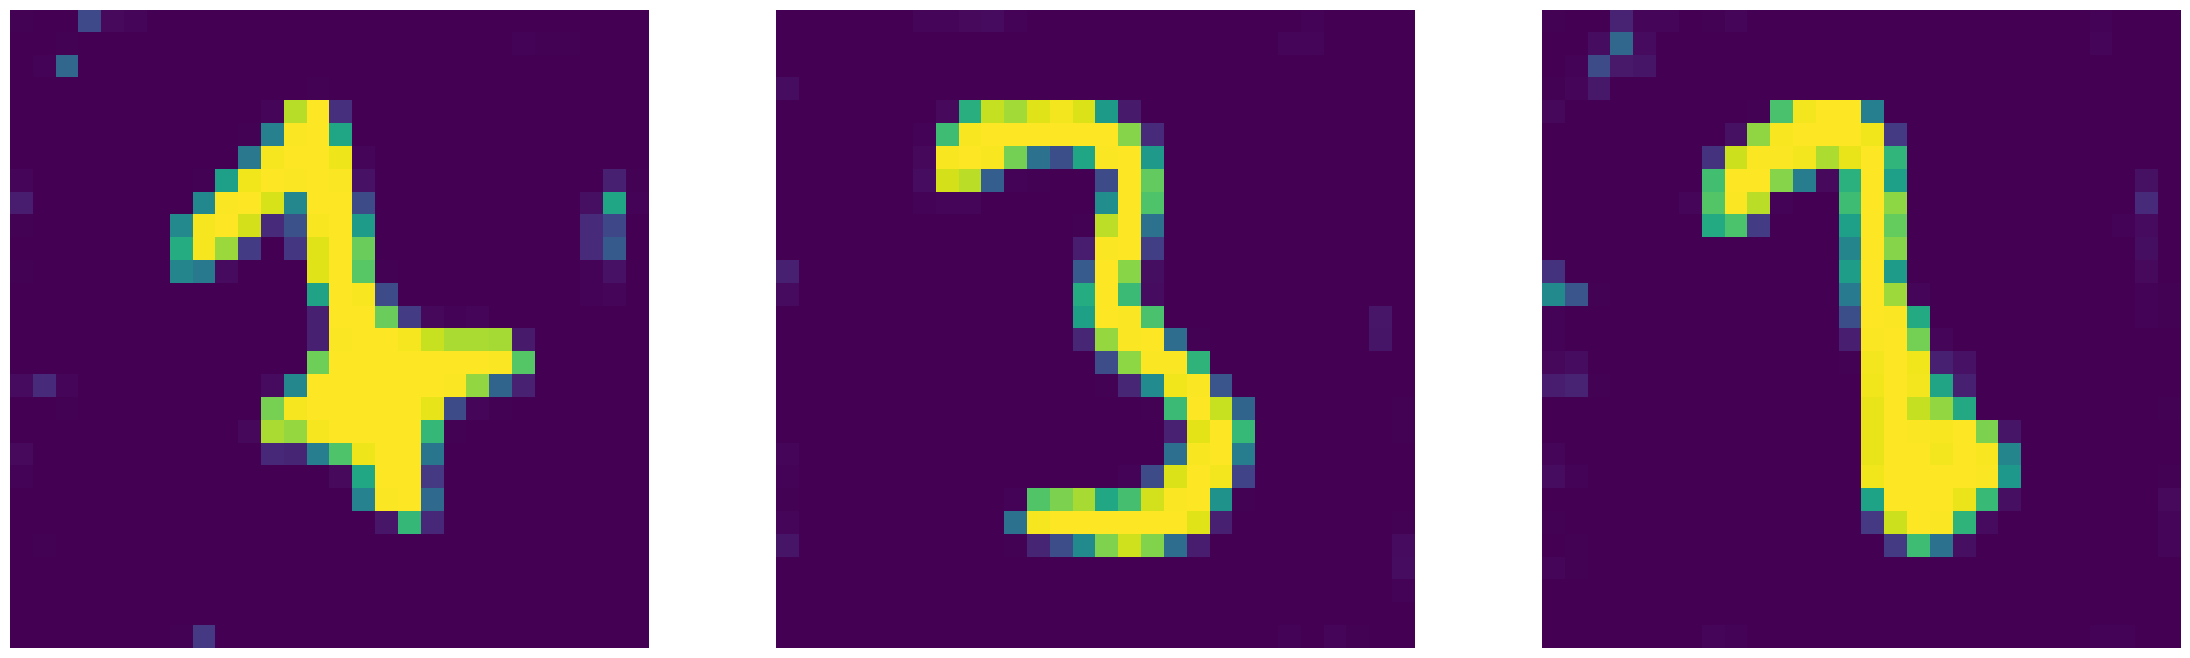

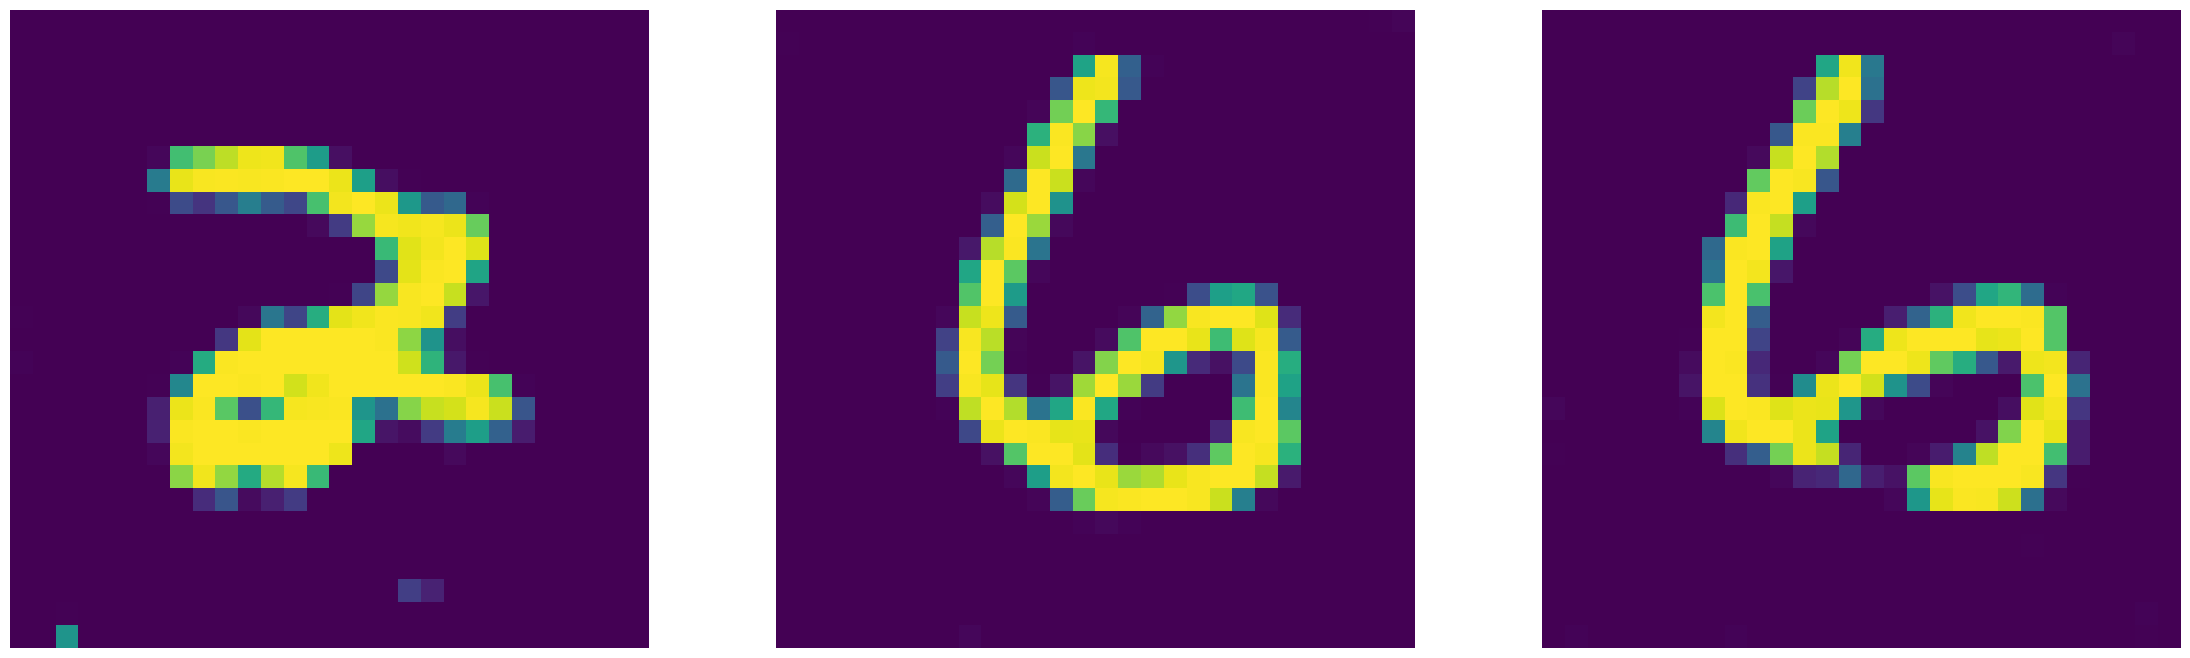

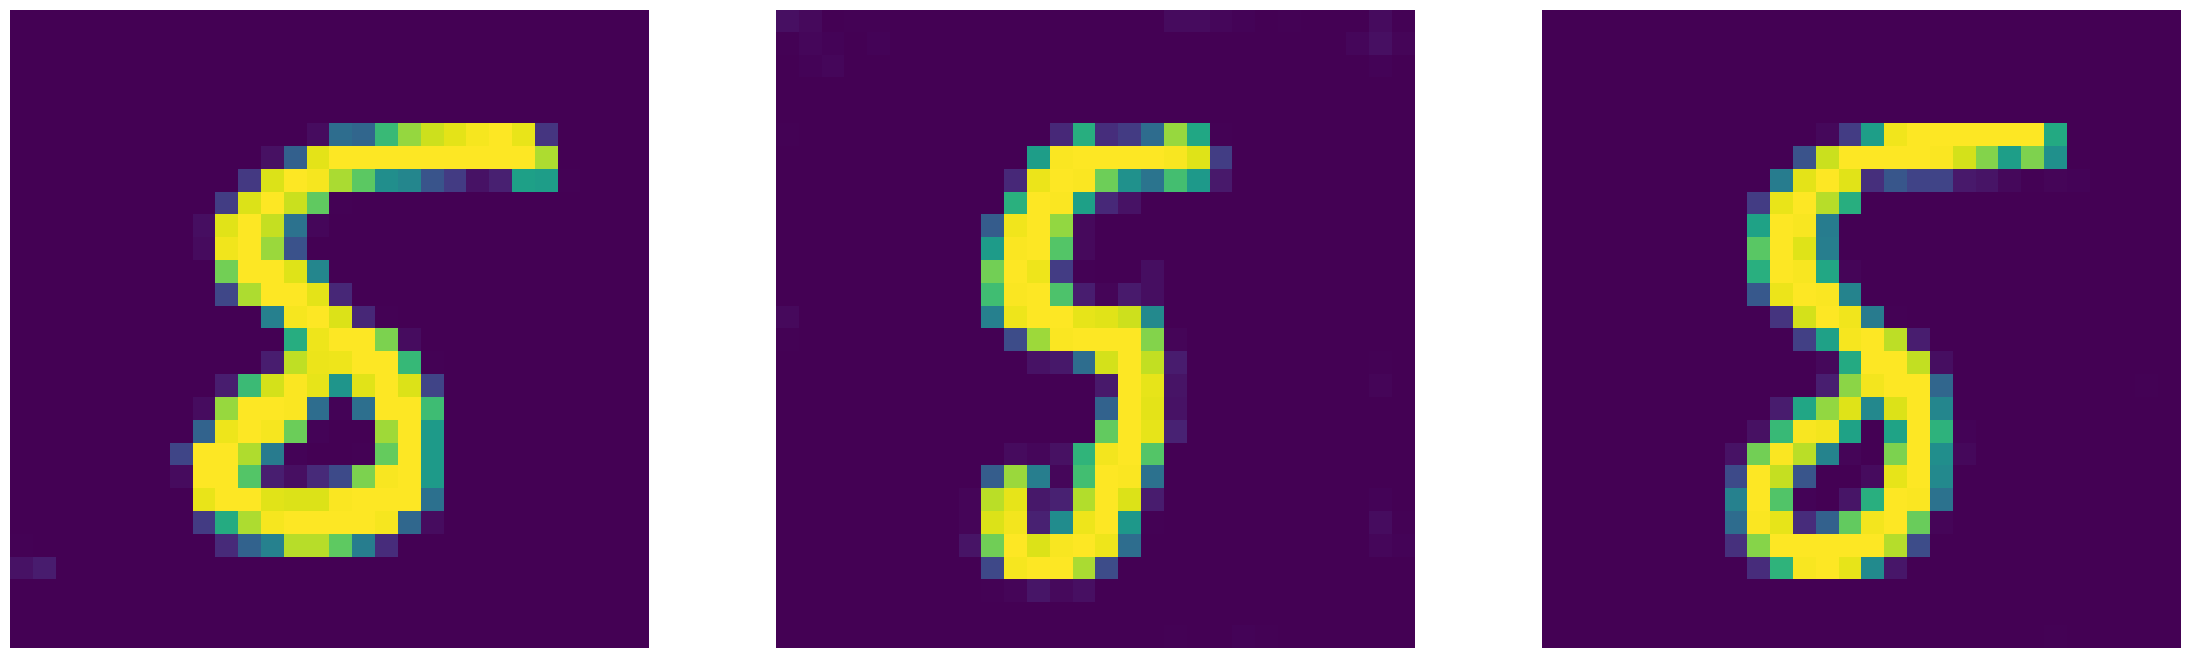

In [10]:
N = 10
for i in range(N):
    noise0 = torch.randn(1, 100, 1, 1, device=device)
    noise1 = torch.randn(1, 100, 1, 1, device=device)
    img_0 = generator(noise0).squeeze().cpu().detach().numpy()
    img_1 = generator(noise1).squeeze().cpu().detach().numpy()
    img_sum = generator(noise0 + noise1).squeeze().cpu().detach().numpy()
    fig, axs = plt.subplots(1, 3, figsize=(28,28))
    axs[0].set_axis_off()
    axs[0].imshow(img_0)
    axs[1].set_axis_off()
    axs[1].imshow(img_1)
    axs[2].set_axis_off()
    axs[2].imshow(img_sum)